In [685]:
# imports
import pandas as pd
import numpy as np
import os
import sqlalchemy 
import datetime as dt
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date, create_engine, inspect, func
import matplotlib
# matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline


Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

In [686]:
# variables

start_date = "2017-04-01"
end_date = "2017-04-14"


Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [687]:
# start up the engine
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
session = Session(engine)

inspector = inspect(engine)
inspector.get_table_names()


# Reflect Database 
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Stations = Base.classes.stations


Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Plot the results using the DataFrame plot method.

In [688]:
# Design a query to retrieve the last 12 months of precipitation data:

last_year = dt.date.today() - dt.timedelta(days=365)

query = session.query(Measurement).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
    
# for i in range(0,len(query)):
#     print(query[i].prcp)

In [689]:
# Select only the date and prcp values:

last_year = dt.date.today() - dt.timedelta(days=365)

query = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
    
# for i in range(0,len(query)):
#     print(str(query[i].date) + " : " + str(query[i].prcp))

In [690]:
# Load the query results into a Pandas DataFrame and set the index to the date column:

query_df = pd.DataFrame(query, columns = ['date', 'prcp'])
query_df.set_index=('date')
query_df.head()


,date,prcp
0,2017-04-06,0.0
1,2017-04-06,0.0
2,2017-04-06,0.0
3,2017-04-06,0.0
4,2017-04-06,0.0


/Users/m/anaconda2/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


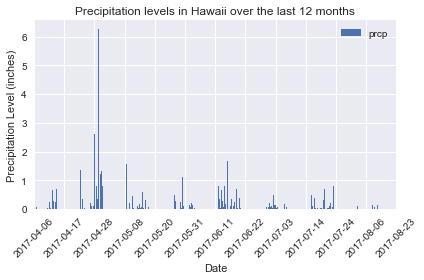

In [691]:
# Plot the results using the DataFrame plot method:

n = round(len(query_df)/12)

# ax = query_df.plot(kind='bar', y='prcp', rot=45)
ax = query_df.plot.bar(title='Precipitation levels in Hawaii over the last 12 months',\
                       rot=45)
ticks = ax.xaxis.get_ticklocs()
ticklabels = [query_df['date'][int(l.get_text())] for l in ax.xaxis.get_ticklabels()]

ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation Level (inches)')
plt.rcParams["figure.figsize"] = [16,9]
plt.tight_layout()

ax.figure.show()

In [692]:
# Use Pandas to print the summary statistics for the precipitation data:

query_df.describe(include = 'all')


,date,prcp
count,734,734.000000
unique,140,NaN
top,2017-04-06,NaN
freq,7,NaN
mean,NaN,0.174005
std,NaN,0.437950
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.020000
75%,NaN,0.140000


Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order

Which station has the highest number of observations?

Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.

Plot the results as a histogram with bins=12.

In [693]:
# Design a query to calculate the total number of stations:

station_count = session.query(Stations).count()

print(station_count)

# -- or -- #

measurement_query = session.query(Measurement).group_by(Measurement.station).order_by(Measurement.station.asc()).statement
measurement_df = pd.read_sql_query(measurement_query, session.bind)
len(measurement_df)


9


9

In [738]:
# Design a query to find the most active stations:
# List the stations and observation counts in descending order

station_counts_query = session.query(Measurement.station, func.count(Measurement.tobs).\
                                    label('tobs_count')).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc())
station_counts_query
# for records in station_counts_query:
#     print(records)
for instance in station_counts_query:
    print(instance.station, instance.tobs_count)
    
# -- or -- #
print("\n")

station_counts_query = session.query(Stations.name, func.count(Measurement.tobs).\
                                    label('tobs_count')).\
select_from(Measurement).join(Stations, Measurement.station == Stations.station).\
group_by(Stations.name).\
order_by(func.count(Measurement.tobs).desc())
station_counts_query
# for records in station_counts_query:
#     print(records)
for instance in station_counts_query:
    print(str(instance.name)+ " : " + str(instance.tobs_count) + " observations")

# -- or -- #

station_counts_query = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(Measurement.tobs.desc()).statement
station_counts_df = pd.read_sql_query(station_counts_query, session.bind)
station_counts_df.columns = ['Station','Total Observations']
station_counts_df = station_counts_df.set_index('Station')
station_counts_df = station_counts_df.sort_values(['Total Observations'], ascending=False)
station_counts_df

USC00519281 2772
USC00513117 2696
USC00519397 2685
USC00519523 2572
USC00516128 2484
USC00514830 1937
USC00511918 1932
USC00517948 683
USC00518838 342


WAIHEE 837.5, HI US : 2772 observations
KANEOHE 838.1, HI US : 2696 observations
WAIKIKI 717.2, HI US : 2685 observations
WAIMANALO EXPERIMENTAL FARM, HI US : 2572 observations
MANOA LYON ARBO 785.2, HI US : 2484 observations
KUALOA RANCH HEADQUARTERS 886.9, HI US : 1937 observations
HONOLULU OBSERVATORY 702.2, HI US : 1932 observations
PEARL CITY, HI US : 683 observations
UPPER WAHIAWA 874.3, HI US : 342 observations


,Total Observations
Station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [748]:
# Which station has the highest number of observations?

station_highest_query = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).limit(1)
for records in station_highest_query:
    for i in range(0,len(records)):
        print(records[i])
    
print("\nStation with highest # of observations: " + str(station_highest_query[0][0]) +
     " with " + str(station_highest_query[0][1]) + " observations counts.\n")

# -- or -- #

station_highest_query = session.query(Stations.name, func.count(Measurement.tobs).\
                                     label('tobs_count')).\
select_from(Measurement).join(Stations, Measurement.station == Stations.station).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).limit(1)
for instance in station_highest_query:
     print(str(instance.name)+ " : " + str(instance.tobs_count) + " observations")

USC00519281
2772

Station with highest # of observations: USC00519281 with 2772 observations counts.

WAIHEE 837.5, HI US : 2772 observations


In [749]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs):

last_year = dt.date.today() - dt.timedelta(days=365)

last_year_tobs = session.query(Measurement).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
    
tobs = [result.tobs for result in last_year_tobs]
# print(tobs)

In [779]:
# Filter by the station with the highest number of observations
last_year_tobs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.tobs.desc()).first()

print("Station with highest # of observations in a day: " + str(last_year_tobs[0]) +
     " with " + str(last_year_tobs[1]) + " observations.\n")

# -- or -- #

last_year_tobs = session.query(Stations.name, Measurement.tobs).\
select_from(Measurement).join(Stations, Measurement.station == Stations.station).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.tobs.desc()).first()

for instance in station_highest_query:
 print(str(last_year_tobs.name)+ " : " + str(last_year_tobs.tobs) + " observations")


Station with highest # of observations in a day: USC00519397 with 87 observations.

WAIKIKI 717.2, HI US : 87 observations


/Users/m/anaconda2/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


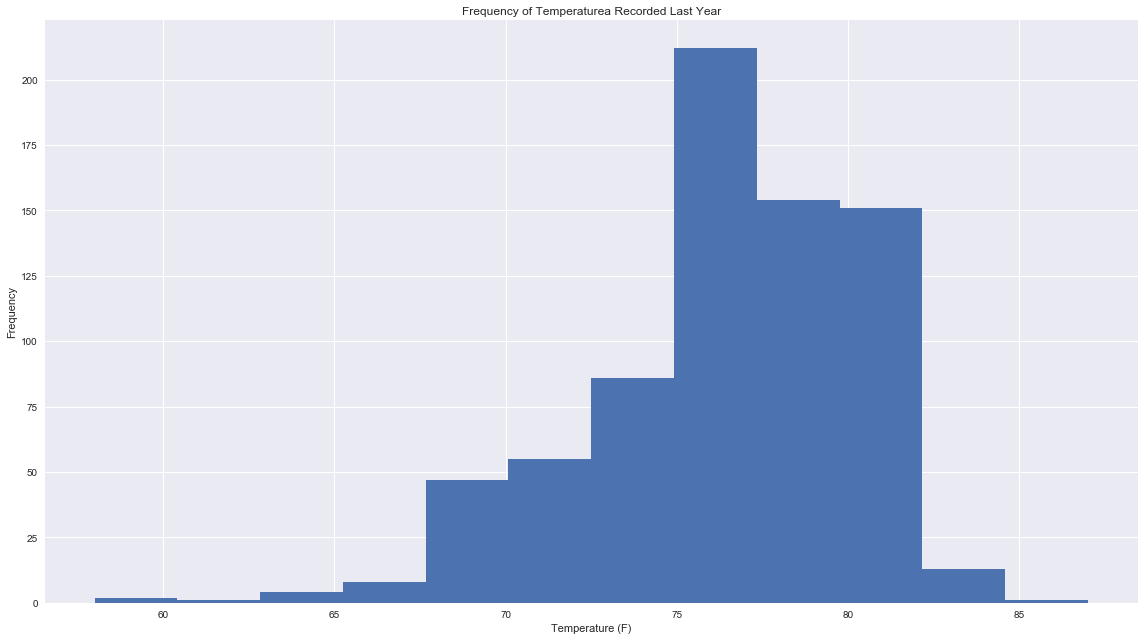

In [780]:
# Plot the results as a histogram with bins=12

fig, ax = plt.subplots()
ax.hist(tobs, bins=12)
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Frequency")
# ax.set_yticks(ypos)
# ax.set_yticklabels(emoji_id[::-1])
ax.set_title("Frequency of Temperaturea Recorded Last Year")
fig.tight_layout()
fig.show()

Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.

Use the average temperature as the bar height.

Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [781]:
# Write a function called calc_temps that will accept a start date and end date in 
# the format %Y-%m-%d and return the minimum, average, and maximum temperatures for 
# that range of dates.

def calc_temps(trip_start_date,trip_end_date):
    
    minimum = session.query(func.min(Measurement.tobs)).\
filter(Measurement.date > trip_start_date, Measurement.date < trip_end_date)\
[0][0]
    if minimum == None:
        print("Trip needs to be longer, exiting")
        return
    average = round(session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date > trip_start_date, Measurement.date < trip_end_date)\
    [0][0],2)
    
    maximum = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date > trip_start_date, Measurement.date < trip_end_date)\
    [0][0]

#     return "minimum = " + str(minimum) + ", " + "maximum = " + str(maximum) + ", " + "average = " + str(average)
    return minimum, average, maximum

In [782]:
# calc_temps_start_date = '2016-04-01'
# calc_temps_end_date = '2016-04-02'
temp_during_vacation = calc_temps(start_date,end_date)
print("Temperature stats during vataion: \n" + 
      "minimum = " + str(temp_during_vacation[0]) + ", " + "maximum = " + str(temp_during_vacation[2]) + ", " + "average = " + str(temp_during_vacation[1]))

Temperature stats during vataion: 
minimum = 67, maximum = 82, average = 74.37


In [783]:
# calc_temps_query = session.query(func.min(Measurement.tobs)).\
# filter(Measurement.date > '2016-04-01', Measurement.date < '2016-04-09').\
# order_by(func.min(Measurement.tobs).desc())
# for record in calc_temps_query:
#     print(record[0])


In [784]:
# calc_temps_query = session.query(func.min(Measurement.tobs)).\
# filter(Measurement.date > '2016-04-01', Measurement.date < '2016-04-09')[0][0]
# # for record in calc_temps_query:
# #     print(record.date)
# # calc_temps_query.all()[0][0]
# calc_temps_query

In [785]:
# for instance in session.query(Measurement).\
# filter(Measurement.date > '2016-04-01', Measurement.date < '2016-04-03'):
#     print(instance.station, instance.tobs)

In [786]:
# for instance in session.query(func.min(Measurement.tobs)).\
# filter(Measurement.date > '2016-04-01', Measurement.date < '2016-04-09'):
#     x=instance[0]
# # for record in calc_temps_query:
# #     print(record.date)
# # calc_temps_query.all()
# x

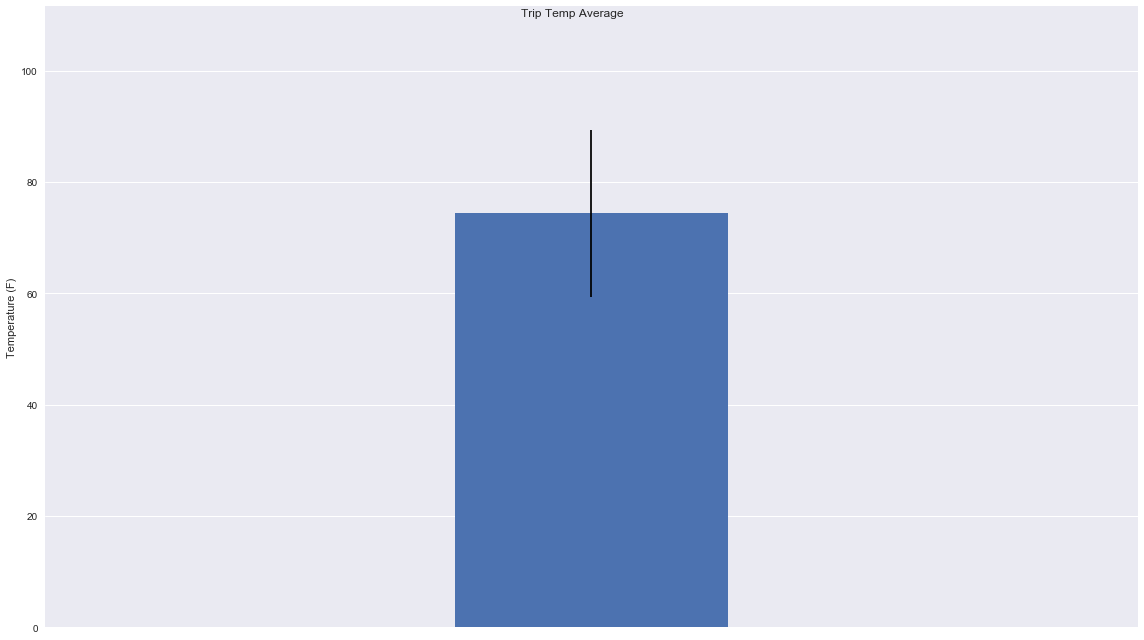

In [788]:
# Plot the min, avg, and max temperature from your previous query as a bar chart
# Use the average temperature as the bar height. 
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temp_analysis = calc_temps(start_date,end_date)
average = temp_analysis[1]
error_bar = temp_analysis[2]-temp_analysis[0]

plt.bar(average,height=average, width =.5, yerr=error_bar)
plt.ylim(0, average*1.5)
plt.xlim(average-1,average+1)
plt.xticks([])
plt.suptitle("Trip Temp Average")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.show()